# Sentiment Analysis in Python
We will be doing sentiment analysis on Amazon food reviews in python using two different techniques:


1.VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach

2.Roberta Pretrained Model from ðŸ¤—

EXTRA- Huggingface Pipeline



## Step 0. Read in Data and NLTK Basics

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-dat

True

In [31]:
# Read in data
df = pd.read_csv('/content/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [32]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

### Exploratory data analysis (EDA)


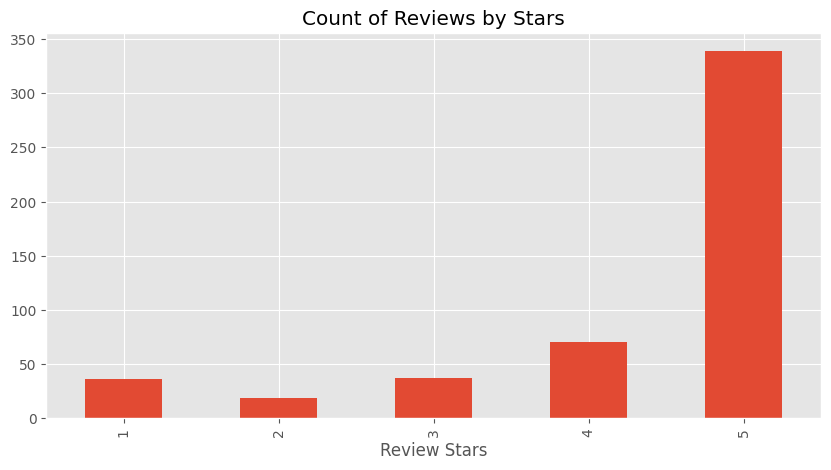

In [33]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Basic NLTK

In [34]:
example = df['Text'][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [35]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

In [36]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [37]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


## Step 1. VADER Seniment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:

1. Stop words are removed

2. each word is scored and combined to a total score.

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [39]:
sia.polarity_scores('This is so good!')

{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'compound': 0.6166}

In [40]:
sia.polarity_scores('This is the worst burger I have ever had.')

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [41]:
sia.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [42]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [43]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [44]:
# Now we have sentiment score and metadata
vaders.head()

Id    neg    neu    pos  compound   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

### Plot VADER results

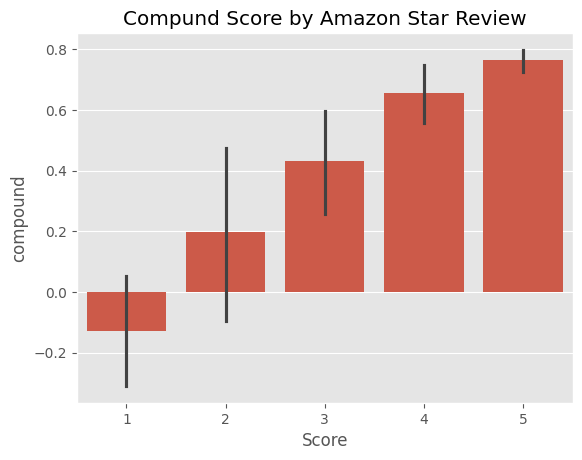

In [45]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

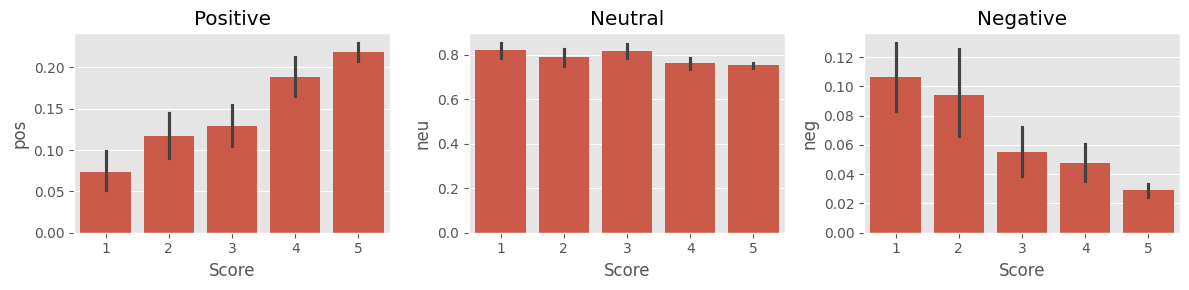

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Step 3. Roberta Pretrained Model
- Use a model trained of a large corpus of data.

- Transformer model accounts for the words but also the context related to other words.

In [47]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [48]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [49]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [50]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.019134142), 'roberta_neu': np.float32(0.07104451), 'roberta_pos': np.float32(0.90982133)}


In [51]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [52]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

### Comparing Scores between models

In [54]:
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Step 3. Combine and compare

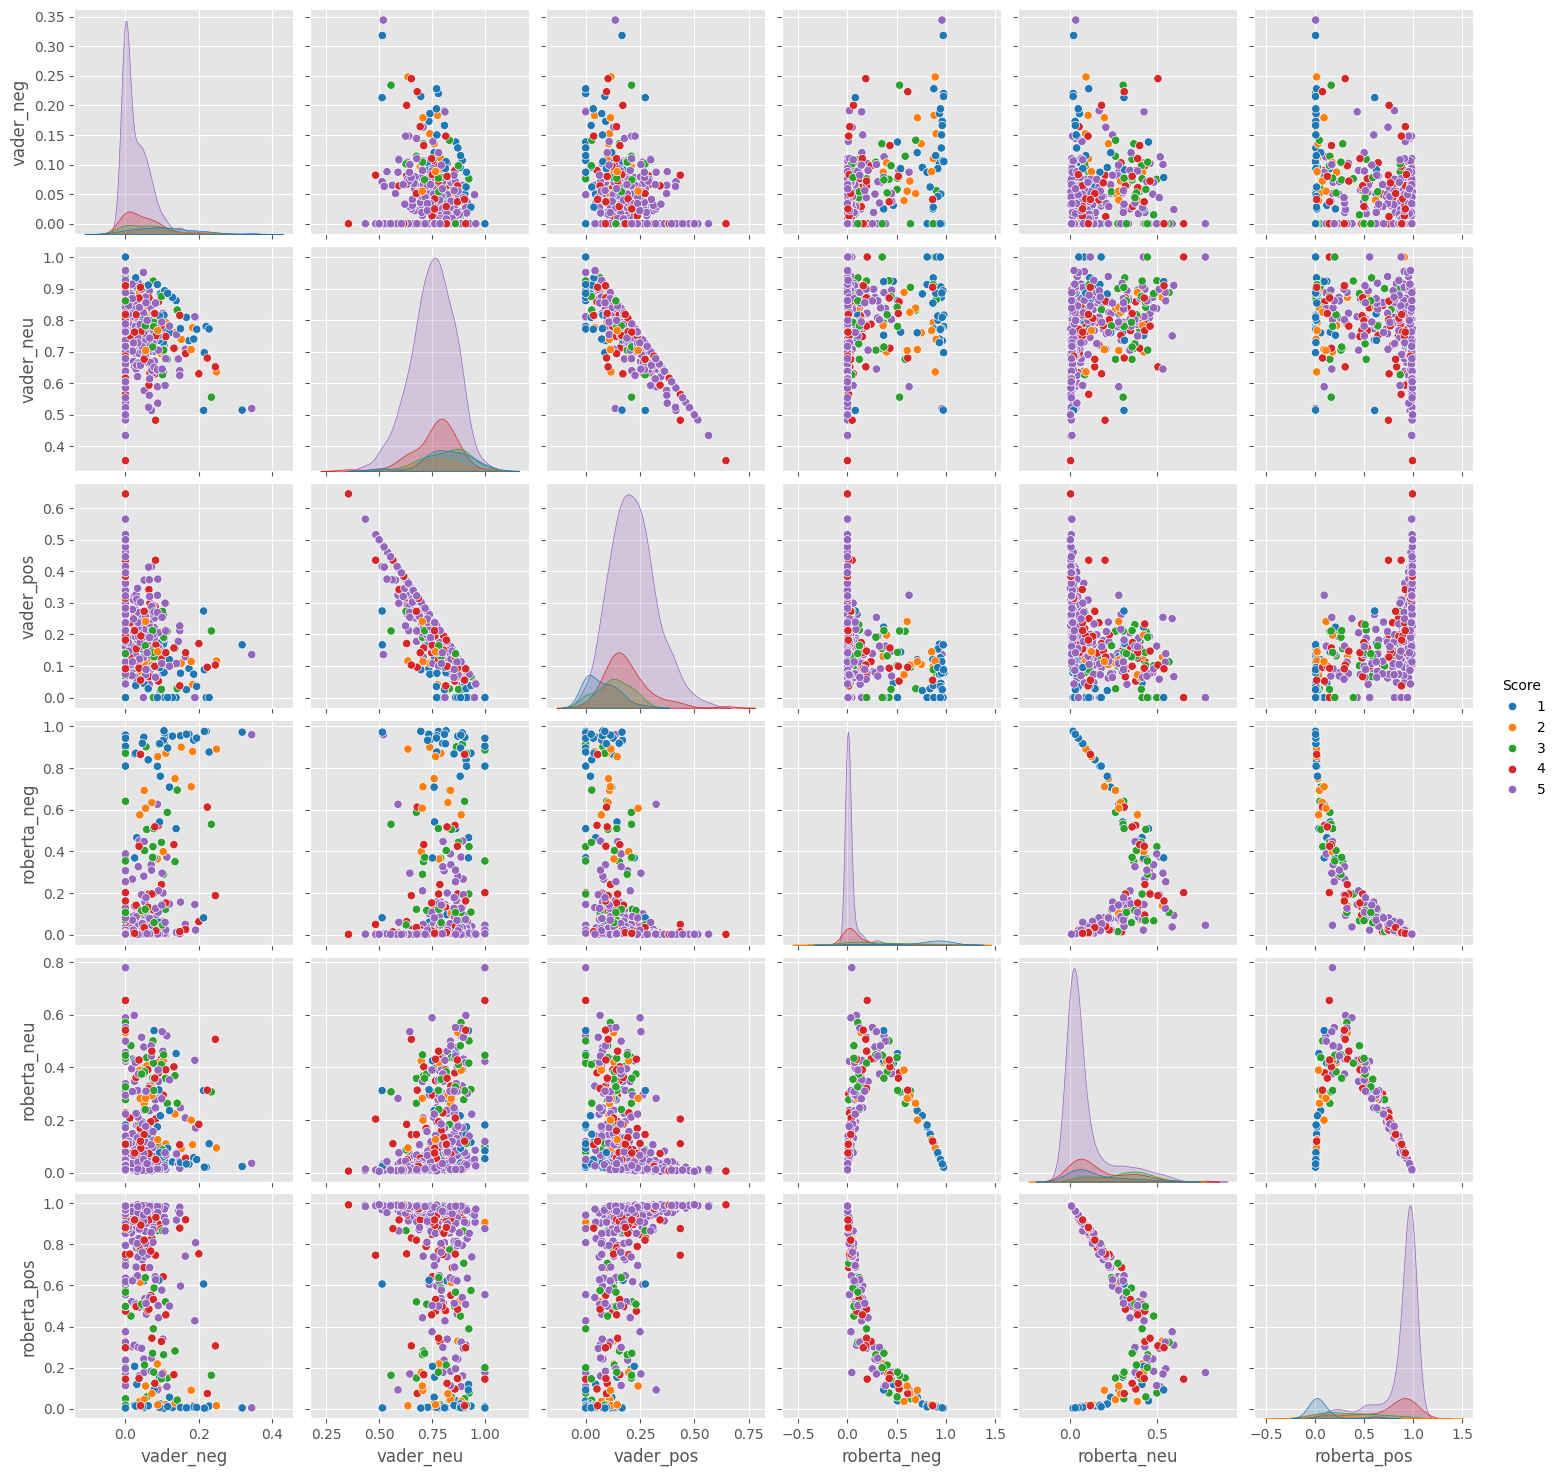

In [55]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Step 4: Review Examples:
Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [56]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [57]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
# negative sentiment 5-Star view

In [58]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [59]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## The Transformers Pipeline
Quick & easy way to run sentiment predictions

In [60]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [61]:
sent_pipeline('I loved the food here!')

[{'label': 'POSITIVE', 'score': 0.9998664855957031}]

In [62]:
sent_pipeline('This place is shit!')

[{'label': 'NEGATIVE', 'score': 0.9996044039726257}]

In [63]:
sent_pipeline('I think this is the best restaurant in town')

[{'label': 'POSITIVE', 'score': 0.9997257590293884}]

In [68]:
import numpy as np

def roberta_to_numeric(row):
    if row['roberta_pos'] >= max(row['roberta_neu'], row['roberta_neg']):
        return 5
    elif row['roberta_neu'] >= max(row['roberta_pos'], row['roberta_neg']):
        return 3
    else:
        return 1

results_df['pred_score'] = results_df.apply(roberta_to_numeric, axis=1)

accuracy = np.mean(results_df['pred_score'] == results_df['Score'])
print(f"Approximate accuracy: {accuracy:.2f}")


Approximate accuracy: 0.71


In [75]:
corr = results_df[['pred_score', 'Score']].corr().iloc[0,1]
print(f"Correlation with star ratings: {corr:.2f}")

Correlation with star ratings: 0.73


In [70]:
from sklearn.metrics import f1_score
import numpy as np

# Define y_true and y_pred using the results_df DataFrame
y_true = results_df['Score']
y_pred = results_df['pred_score']

f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted F1-score: {f1_weighted:.3f}")

Weighted F1-score: 0.644


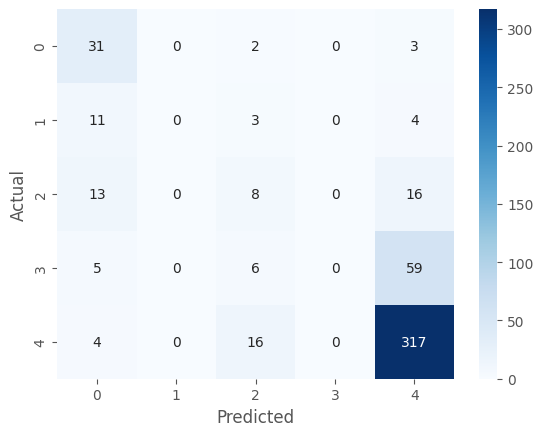

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Correlation with star ratings: 0.73


In [67]:
import plotly.express as px
fig = px.box(results_df, x='Score', y='roberta_pos', title='RoBERTa Positive Sentiment vs Star Ratings')
fig.show()